# 1-D Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD. It is surprising that this little equation can teach us so much! Here it is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit), we know that:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Our discrete equation, then, is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Now let's define a few variables; we want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i\in(0,2)$.  We'll define a variable `nx`, which will be the number of grid points we want and `dx` will be the distance between any pair of adjacent grid points.  

In [2]:
nx = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
dt = .005  #dt is the amount of time each timestep covers (delta t)
T = .5
nt = int(round(float(T)/dt)) #nt is the number of timesteps we want to calculate
c = 1      #assume wavespeed of c = 1
L = 2

xs = np.linspace(0, 2, nx)

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

Here, we use the function `ones()` defining a `numpy` array which is `nx` elements long with every value equal to 1.

In [3]:
u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

Now let's take a look at those initial conditions using a Matplotlib plot.  We've imported the `matplotlib` plotting library `pyplot` and the plotting function is called `plot`, so we'll call `pyplot.plot`. To learn about the myriad possibilities of Matplotlib, explore the [Gallery](http://matplotlib.org/gallery.html) of example plots.

Here, we use the syntax for a simple 2D plot: `plot(x,y)`, where the `x` values are evenly distributed grid points:

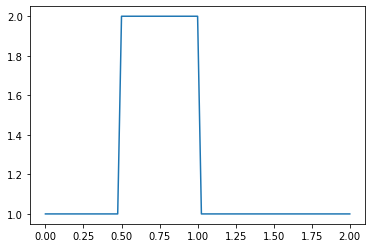

In [4]:
plt.plot(np.linspace(0, 2, nx), u);

Why doesn't the hat function have perfectly straight sides? Think for a bit.

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.  

For every element of our array `u`, we need to perform the operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.  

We first initialize our placeholder array `un` to hold the values we calculate for the $n+1$ timestep, using once again the NumPy function `ones()`.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other. Note the use of the nifty `range()` function. When we write: `for i in range(1,nx)` we will iterate through the `u` array, but we'll be skipping the first element (the zero-th element).  *Why?*

In [5]:
un = np.ones(nx) #initialize a temporary array
us = np.zeros((nt, nx))
for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    us[n,:] = u

**Note**—We will learn later that the code as written above is quite inefficient, and there are better ways to write this, Python-style. But let's carry on.

Now let's try plotting our `u` array after advancing in time.

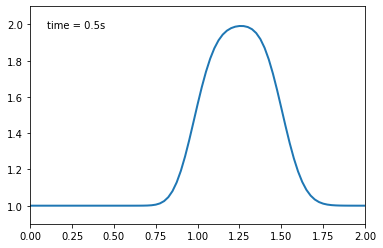

In [7]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((.9, 2.1))

line, = ax.plot([], [], lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    y = us[i,:]
    line.set_data(xs, y)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())

OK! So our hat function has definitely moved to the right, but it's no longer a hat.  **What's going on?**